Practical-Read the URL http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html to get the height and weight data. Convert the units to feet and inches for height, and kilograms for weight. Perform regression analysis using normal equation method by taking into account that size of data which works best as per your system's configuration. Appropriately assume any required information yourself.

In [ ]:
import pandas as pd
import numpy as np

# Load data from CSV
data = pd.read_html(
    'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html')
print(data)

[           0               1               2
0      Index  Height(Inches)  Weight(Pounds)
1          1        65.78331        112.9925
2          2        71.51521        136.4873
3          3        69.39874        153.0269
4          4         68.2166        142.3354
...      ...             ...             ...
24996  24996        69.50215        118.0312
24997  24997        64.54826        120.1932
24998  24998        64.69855        118.2655
24999  24999        67.52918        132.2682
25000  25000        68.87761        124.8742

[25001 rows x 3 columns]]


In [ ]:
df = data[0]
df

,0,1,2
0,Index,Height(Inches),Weight(Pounds)
1,1,65.78331,112.9925
2,2,71.51521,136.4873
3,3,69.39874,153.0269
4,4,68.2166,142.3354
...,...,...,...
24996,24996,69.50215,118.0312
24997,24997,64.54826,120.1932
24998,24998,64.69855,118.2655
24999,24999,67.52918,132.2682


In [ ]:
c = 1
for i in df[1]:
  if i != "Height(Inches)":
    # print(i)
    k = i
    k = float(k)
    k = k/12
    # print(k)
    df[1][c] = k
    c = c+1
  else:
    df[1][0] = "Height(Feet)"


In [ ]:
df[1]

0        Height(Feet)
1            5.481942
2            5.959601
3            5.783228
4            5.684717
             ...     
24996        5.791846
24997        5.379022
24998        5.391546
24999        5.627432
25000        5.739801
Name: 1, Length: 25001, dtype: object

In [ ]:
c = 1
for i in df[2]:
  if i != "Weight(Pounds)":
    # print(i)
    k = i
    k = float(k)
    k = k*0.45359237
    # print(k)
    df[2][c] = k
    c = c+1
  else:
    df[2][0] = "Weight(Kg)"

In [ ]:
df[2]

0        Weight(Kg)
1         51.252536
2         61.909598
3         69.411834
4         64.562251
            ...    
24996     53.538052
24997     54.518718
24998     53.644328
24999     59.995846
25000     56.641984
Name: 2, Length: 25001, dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
heights = []

for i in df[1]:
  if i != "Height(Feet)":
    # print(i)
    k = i
    k = float(k)
    # print(k)
    heights.append(k)

In [ ]:
weights = []
for i in df[2]:
  if i != "Weight(Kg)":
    k = i
    k = float(k)
    weights.append(k)

Optimal θ0: -37.4557270011563
Optimal θ1: 16.783696664514117


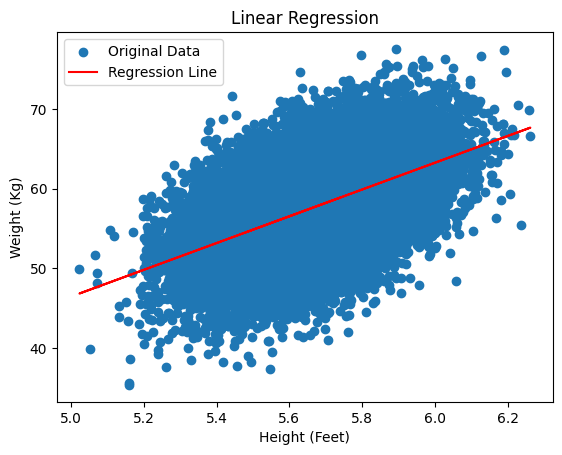

In [ ]:
mean_height = sum(heights) / len(heights)
mean_weight = sum(weights) / len(weights)

# Calculate the coefficients
numerator = sum((heights[i] - mean_height) * (weights[i] - mean_weight) for i in range(len(heights)))
denominator = sum((heights[i] - mean_height) ** 2 for i in range(len(heights)))

theta_1 = numerator / denominator
theta_0 = mean_weight - theta_1 * mean_height

print("Optimal θ0:", theta_0)
print("Optimal θ1:", theta_1)

# Calculate predicted weights
predicted_weights = [theta_0 + theta_1 * h for h in heights]

# Plot the data points and the regression line
plt.scatter(heights, weights, label="Original Data")
plt.plot(heights, predicted_weights, color='red', label="Regression Line")
plt.xlabel("Height (Feet)")
plt.ylabel("Weight (Kg)")
plt.title("Linear Regression")
plt.legend()
plt.show()